<p>
     <img src="https://raw.githubusercontent.com/hhelmbre/Rockstar-Lifestyle/master/doc/Logo.png" width="19%" align="left">
 
</p>

---
  #     Image Cropping and Manipulation Using Python
---

### The folling jupyter notebook will use image manipulation and image cropping in order to get datasets for a neural network. It uses the imcrop.py python file and manipulates using multihistogram.py

---

The following functions will be used:

* img_crop(path = '', file = '', filetype = '.png', res = (256,256))
    * Description: This function acts as a wrapper for the entire py file. It will input an image file and given resolution and output a stacked set of cropped tif images. It also saves the set into a tif image set on the current folder.
    * Parameters: 
    
        - path: String of path of file in the form of r"C:/.../.../"
        - file: String of file name to crop
        - filetype: Type of file - only use '.png' or '.tif'
        - res: resolution (res_x, res_y) in pixels of cropped image
    
    * Output:
        - img_stack : (n, res_x, res_y) array of n stacks of cropped images
    
* _imgSave(td, stacked_img)
    * Description: This function is a private function for imCrop() that saves the given image array to a tif file with given metadata.
    * Parameters: 
    
        - td : object : tileData() object containing required data
    
    * Output:
        - stacked_img : (n, res_x, res_y) array of n stacks of
    
* _crop(td)
    * Description: This private function for imCrop() crops an image attached to object td based on its applied resolution
    * Parameters: 
    
        - td : object : tileData() object containing required data
    
    * Output:
        - img_stack : np.uint16 : (n, res_x, res_y) array of n stacks of cropped images
    
* stack_load(path = '', file = '')
    * Description: This function loads the given cropped stacked image into a numpy arrays
    * Parameters: 
    
        - path: str : String of path of file in the form of r"C:/.../.../"
        - file: str : String of file name
    
    * Output:
        - An (n, res_x, res_y) array of n stacks of cropped images

* stackmrh(stacked_img)
    * Description: This function loads the given cropped stacked image into a numpy arrays
    * Parameters: 
    
        - stacked_img : a 3d array containing all stacked images
    
    * Output:
        - objlist : an object array containing descriptors for every cropped image

The following objects will be used:

* ImgID()
    * Description: Descriptor object for given image
    * Contains:
        - name : dict of the image# in the crop
        - data : image data
        - MRH : Multi Resolution Histogram data for image
        - GB : Gaussian blur data for image
        - bin_list : bin list for corresponding MRH
        - count : number of objects in image
    
* TileData()
    * Description: Identifier for ever tile crop for later ease of use in stacking
    * Contains:
        - im_path : string of image path given by user
        - res : resolution given by user
        - Data : image data from crop
    


As a sidenote, there are a few decisions made in this file and in this example with future projects in mind. This project is in collaboration with Nance Lab of UWSeattle ChemE Department and will possibly be improved and altered in the future.

### The first step is to define our imports :

In [1]:
from rockstarlifestyle import imcrop as iC # Example file
import pandas as pd
import matplotlib.pyplot as plt
import skimage
import skimage.io as sio

In [2]:
# file : Change this to the name of the image you want to use
file = 'P10_PAM_ipsi_40x_hippo_scan_MaxIP'  
# filetype : Do not change this, currently, images only work as .png. This is just due to how the image is 
# saved and will be updated later
filetype = '.png' 
# path : Change this to the location of the image you want to use
path = r"C:/Users/David/Rockstar-Lifestyle/Images/" 

In [3]:
# res_x and res_y : Change this to alter resolution. We want a square resolution of 256x256 pixels
res_x = 256
res_y = 256

# ij : Just for future collab with imagej
ij = True

im_path = path + file+ filetype

#### Lets look at the image we're manipulating:

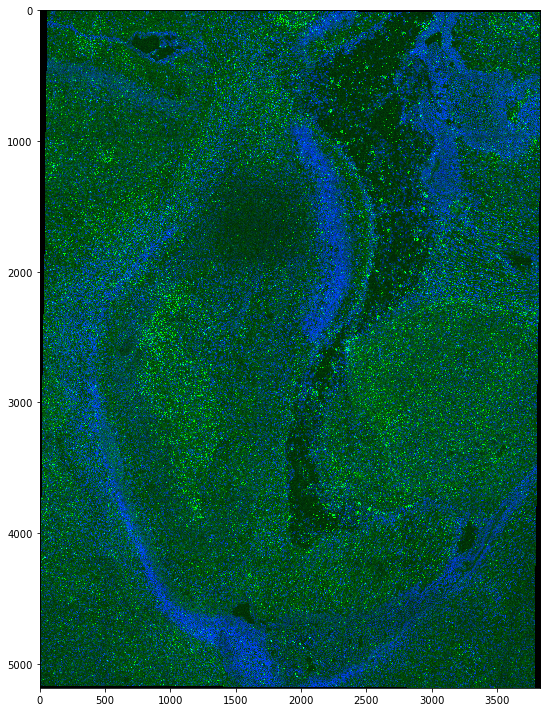

In [4]:
timpng = sio.imread(im_path)
plt.subplots(figsize=(10,10))
sio.imshow(timpng, vmin = 10, vmax = 210)

Wow! So colorful! Well, to analyze specific features in this picture, we are going to have to isolate the image. Skimage reads a .png file as a 3-dimmension array in the form of "[data_x, data_y, channel]" where channel represents the color band used (r,g,b). Our goal in this project is to quantify proteins (the green dots) within the image, so we want to isolate the second channel.

* Note: vmin and vmax in sio.imshow() represent the minimum and maximum colorbar for visualization and is adjusted on a per-image basis

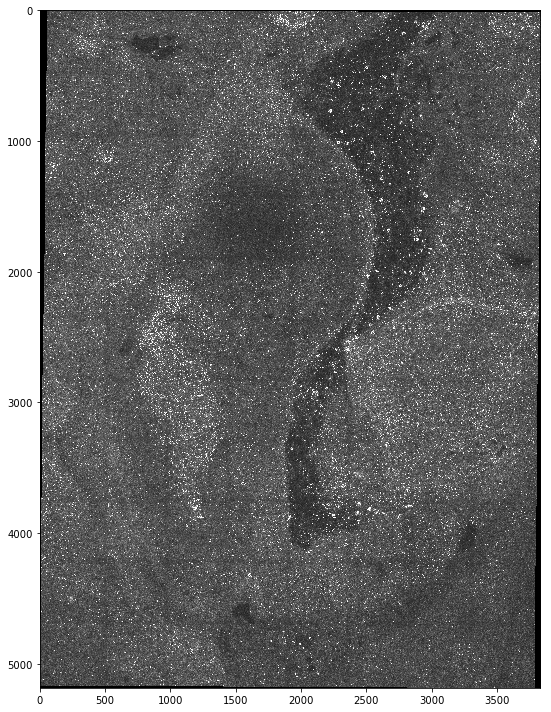

In [5]:
timpng = sio.imread(im_path)
plt.subplots(figsize=(10,10))
sio.imshow(timpng[:,:,1] , vmin = 10, vmax = 210)

Much better! As shown, the blue cells are no longer represented in the data. This is the image we will be using for our imcrop file (and later on our neural network)

#### Now we can implement our imcrop:

The first thing to implement is imgCrop. This will crop the image into even res_x by res_y (256x256) images which we can later analyze. As shown above, the image given to us also had some error along the border - the image was probably rotated when captured. imgCrop implements a border function which attempts to crop within a boundary in the hopes we can get rid of those black bars.

In [6]:
img_stack = iC.img_crop(path, file, filetype, (res_x,res_y))

Lets see what that gave us:

280


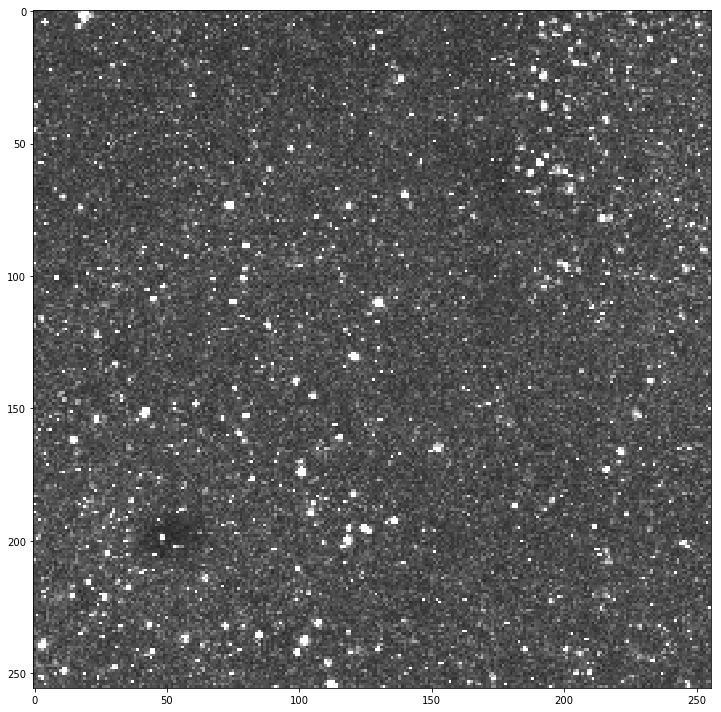

In [7]:
print(len(img_stack))
plt.subplots(figsize=(10,10))
sio.imshow(img_stack[6])

Perfect! With the given inputs, our function made 280 even 256x256 crops where we can call whatever image we want. Further implementation in this package will allow for an exact location within the parent image to be outputted.

Now that we have a nice stack of crops, we can implement another method to attach information to every image:
stackMRH will apply gaussian and multires methods to every crop and create an object array containing some useful information including:
- name : dict of the image# in the crop
- data : image data
- MRH : Multi Resolution Histogram data for image
- GB : Gaussian blur data for image
- bin_list : bin list for corresponding MRH
- count : number of objects in image

In [8]:
obj_stack = iC.stackmrh(img_stack)

Lets see what that did:

{'Image': '101/280'}
[[ 59  69  74 ...  82  72  74]
 [ 67  59  82 ...  64  77  72]
 [ 61  90  82 ... 100  61  67]
 ...
 [100  95 100 ...  61  87  64]
 [105  64  72 ...  72  90  84]
 [ 69  84  69 ...  56  87  87]]
[array([[ 59,  69,  74, ...,  82,  72,  74],
       [ 67,  59,  82, ...,  64,  77,  72],
       [ 61,  90,  82, ..., 100,  61,  67],
       ...,
       [100,  95, 100, ...,  61,  87,  64],
       [105,  64,  72, ...,  72,  90,  84],
       [ 69,  84,  69, ...,  56,  87,  87]], dtype=uint8), array([[70, 70, 70, ..., 72, 73, 73],
       [71, 71, 71, ..., 73, 73, 73],
       [71, 71, 71, ..., 74, 74, 74],
       ...,
       [80, 80, 81, ..., 77, 78, 78],
       [80, 81, 81, ..., 77, 77, 77],
       [81, 81, 81, ..., 76, 77, 77]], dtype=uint8)]
[([array([0.9296875, 0.96875  , 1.       ]), array([0.9375    , 0.98828125, 1.        ]), array([0.92578125, 0.98828125, 1.        ]), array([0.94140625, 0.95703125, 1.        ]), array([0.93359375, 0.97265625, 1.        ]), array([0.9375  

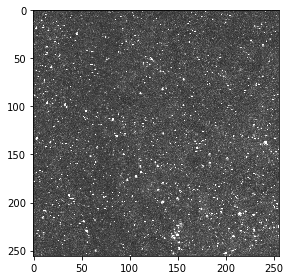

In [9]:
print(obj_stack[100])
print(obj_stack[100].name)
print(obj_stack[100].data)
print(obj_stack[100].gb)
print(obj_stack[100].mrh)
sio.imshow(obj_stack[100].data)

We can see that we were able to get an ID ({'Image': '101/280'}), an array of image data which could subsequently be outputted using skimage, an array of gaussian blur data, and an array of multires resolution which can be used for further processing in our other packages

That concludes the uses for this package, this package is very useful in visualizing and modifying image data. 
Further development can make this package more robust and help analyze/visualize data further.